<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_08_nn_keras__V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



| Función de activación | Ventajas | Desventajas |
| --------------------- | -------- | ----------- |
| Lineal | Simple y rápida de calcular | Le falta introducir no linealidad, no limita el rango de salida |
| Sigmoide | Mapea la salida al rango (0, 1), útil para clasificación binaria | Se satura fácilmente, tiene gradientes pequeños, no tiene media cero |
| Tangente hiperbólica | Mapea la salida al rango (-1, 1), tiene media cero, es más fuerte que la sigmoide | Se satura fácilmente, tiene gradientes pequeños |
| ReLU | Introduce no linealidad, tiene gradientes grandes, es rápida de calcular | Puede morir si la entrada es negativa, no tiene media cero |


# Keras: https://keras.io/api/layers/activations/

Keras es una bilbioteca con librerias de código abierto para entrenar modelos de deep learning DL que puede ejecutarse en TensorFlow. Keras permite construir bloque de arquitectura de la redes neuronales, y permite construir desde un perceptron hasta redes neuronales convolucionales  y recurrentes de una manera amigable con el usuario.


# Funciones de activación

Tipos de funciones de activación:

## Lineal:

Una transformación lineal, la cual se muestra en la siguiente figura, consiste básicamente, en la función identidad. En estra transformación, la variable dependiente tiene una relación directa y proporcional con la variable independiente. En términos prácticos, lo anterior significa que una función de activación lineal pasa la señal sin realizar un cambio sobre esta. Este el típo de activación que se usa en la capa de entrada de las redes neuronales.


## Sigmoide:
Como todas las transformaciones logísticas, las sigmoides puede reducir la cantidad de valores extremos o outliers en los datos sin eliminarlos. En la siguiente figura se ilustra dicha función sigmoide:

Una función sigmoide convierde una variable independiente de rango infinito en probabilidades con un rango entre 0 y 1. La mayoria de las salidas serán cercanas a 0 o 1, que corresponden a zonas de saturación.

La función de activación sigmoide devuelve una probabilidad independiente para cada clase.



##  Tanh
Corresponde a una función trigonométrica hiperbólica donde el rango de salida de tanh varía entre -1 y 1, note la diferencia con la función sigmoide. La ventaja de tanh es puede tratar los números negativos de forma más eficiente que la función sigmoide.


## ReLU: Rectified Linear Unit (Unidad Rectificadad Lineal)
La unidad rectificada lineal es una trasformación más intersante que activa un nodo solo si la entrada se encuentra por encima de cierta cantidad. Si la entrada está por debajo de zero, la salida es cero, pero si la entrada alcanza un valor umbral, la salida tiene una relación lineal con la variable dependiente.

Las funciones de activaciones ReLU representan actualmente el estado de arte en la aplicación de funciones de activación, ya que han demostrado un buen desempeño en diferentes situaciones. Dado que el gradiente de la ReLU es cero o constante, permite evitar el problema del desvanecimiento del gradiente. Las funciones de activación ReLu han demostrado un mejor entrenamiento en la práctica que las funciones de activación sigmoidea.

Las funciones de activación ReLU se usan, normalmente, en las capas ocultas.

Existen mas funciones de activación, no obstante, nos centraremos a continuación solo en una más. Esta función de activación es usada en la capa de salida de la clasificación multiclase mediante una red neuronal. Es conocida como Softmax.


## Softmax
La función de activación Softmax representa una generalización de la regresión logística en el sentido que puede ser apllicada a un conjunto continuos de datos (en lugar de una clasificación binaria) y puede contener múltiples fronteras de desición. Esta función maneja sistemas multinomiales para el etiquetado. Softmax es una función que normalmente se usa en la capa de salida de un clasificador.

La función de activación Softmax devuelve la distribución de probablilidades de clases mutuamente excluyentes.

Consideremos el siguiente ejemplo en donde se ilustra, entre otra cosas la definición de la función SoftMax:

$S(y_i)=\frac{e^y_i}{\sum e^{y_i}}$


En deep learning, el térno capa logit se usa para la última capa de neuronas de la red neuronal para el problema de clasificación que produce unos valores de predicción "crudos" de valores reales que varian en el intervalo . En concreto, las cantidades logits son los puntajes crudos de la ultima capa de la red neuronal, antes de que se les aplique la activación.


Ref: https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S07_Funciones_Activacion_Arquitectura_Red.ipynb

In [90]:
import numpy as np
from tensorflow import keras


In [91]:
# 1: A través de una capa medidante el método Activación:
modelA = keras.models.Sequential()
modelA.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Activation('relu'))#  Capa activación
modelA.add(keras.layers.Dense(64))
modelA.add(keras.layers.Activation('tanh'))#  Capa activación
modelA.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 64)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# 2: Mediante el argumento activation
modelB = keras.models.Sequential()
modelB.add(keras.layers.Dense(32, input_shape=(16,)))
modelA.add(keras.layers.Activation('relu'))#  Capa activación
modelB.add(keras.layers.Dense(64, activation='tanh'))
modelB.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         2,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# 3: Mediante una función de Tensor-flow por elementos.
modelC = keras.models.Sequential()
modelC.add(keras.layers.Dense(32, activation='relu', input_shape=(16,)))
modelC.add(keras.layers.Dense(64, activation='tanh'))
modelC.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         2,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,656 (10.38 KB)

 Trainable params: 2,656 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

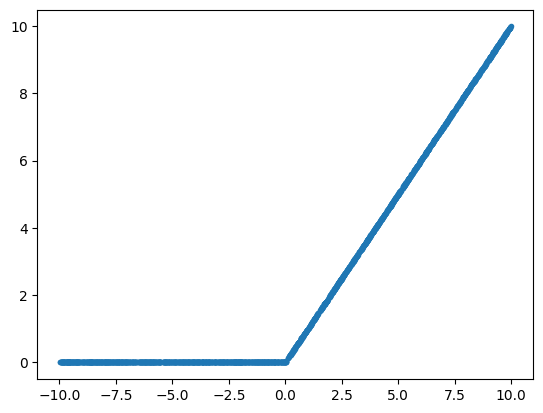

In [94]:
# Vamos a graficar las funciones de activación y modificar los parámetros que las definen
# Encuentran los parámetros en https://keras.io/api/layers/activations/
# Relu
import matplotlib.pyplot as plt
x=np.random.uniform(low=-10.0, high=10, size=(2000,))
y=keras.activations.relu(x, negative_slope=0, max_value=None, threshold=0)
plt.plot(x,y,'.')

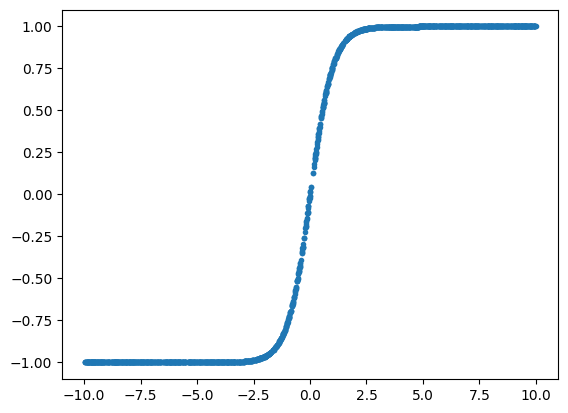

In [95]:
# tanh
y=keras.activations.tanh(x)
plt.plot(x,y,'.')

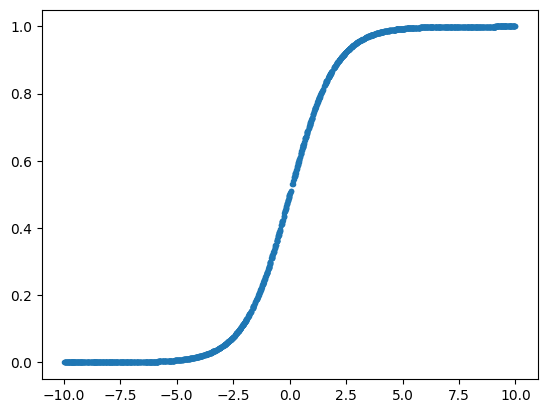

In [96]:
#sigmoid
y=keras.activations.sigmoid(x)
plt.plot(x,y,'.')

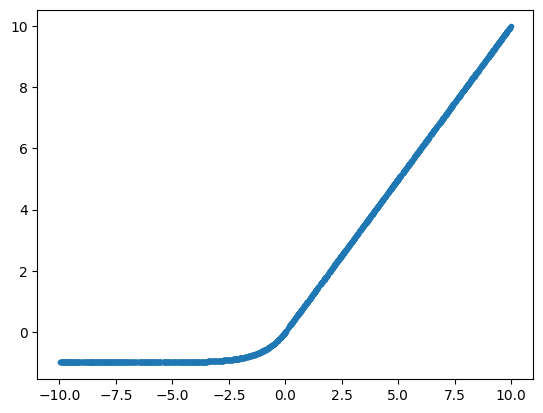

In [97]:
# elu
y=keras.activations.elu(x, alpha=1.0)
plt.plot(x,y,'.')

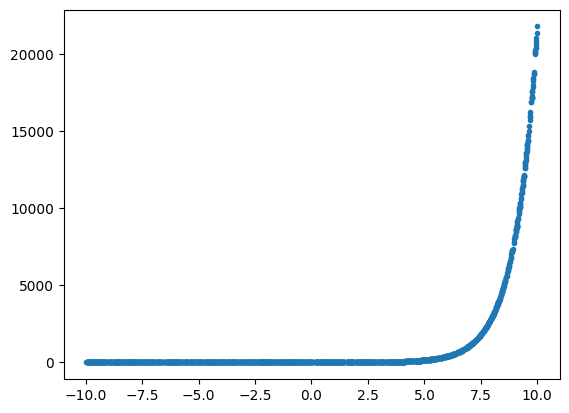

In [98]:
# Exponential
y=keras.activations.exponential(x)
plt.plot(x,y,'.')

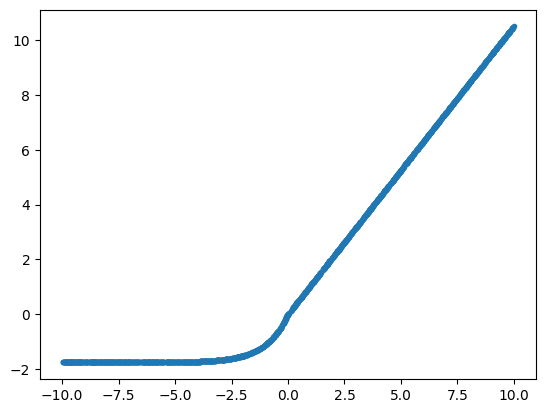

In [99]:
# Selu
y=keras.activations.selu(x)
plt.plot(x,y,'.')

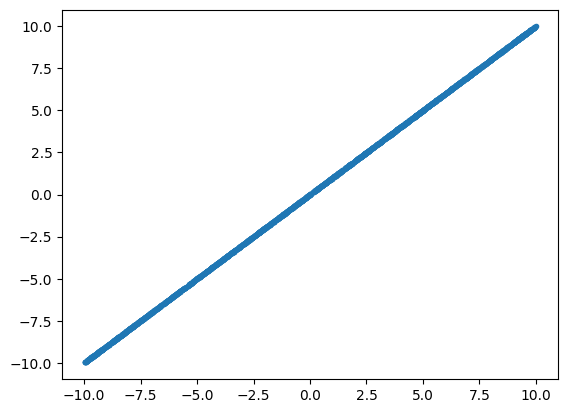

In [100]:
# Linear
y=keras.activations.linear(x)
plt.plot(x,y,'.')

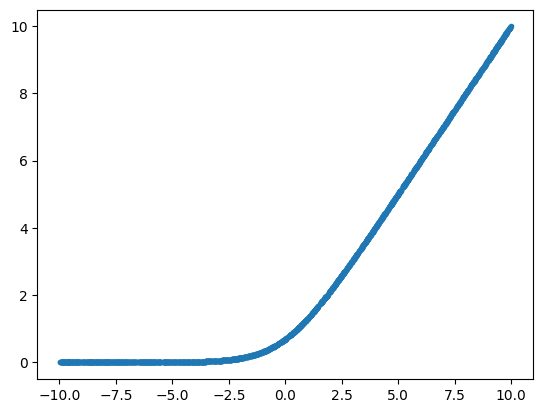

In [101]:
y=keras.activations.softplus(x)
plt.plot(x,y,'.')


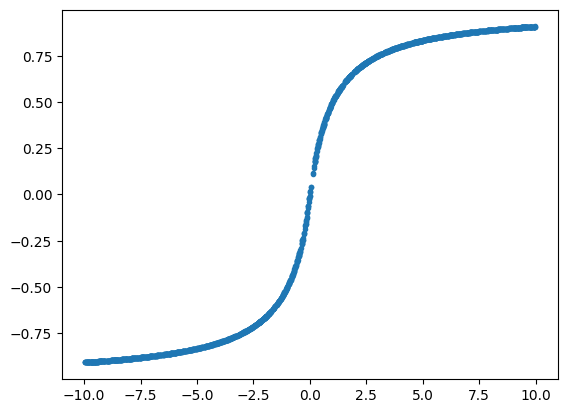

In [102]:
y=keras.activations.softsign(x)
plt.plot(x,y,'.')

# Arquitectura y funcionalidad de la Redes neuronales secuenciales:

De las funciones de activación habladas en la clase anterior podemos advertir dos características que deben poseer una red neuronal:

Las funciones de activación de las capas ocultas deben ser funciones de activación no lineales, con el fín de que la red actue como un aproximador universal a una función.

La función de activación de la capa de salida determina el tipo de clasificación/regresión del problema que se pretende solucionar.
Como regla general, se tiene que la función de activación de las capas ocultas puede ser definida como una función ReLU y, dependiendo del problema, podemos definir la función de activación de la capa de salida como:

- Función de activación sigmoide: si el problema de clasificación es binario.
- Función de activación Softmax: si el problema de clasificación es multiclase.
- Función de activación lineal: si el problema se trata de una regresión.

En resumen, en la siguiente figura se ilustran la arquitectura de red de los problemas que pueden presentarse en la clasificación/regresión usando una red neuronal secuencial y las funciones de activación definidas en las capas que la componen.

In [103]:
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S08_Problemas_FFNN.ipynb
# https://github.com/ssanchezgoe/curso_deep_learning_economia/blob/main/NBs_Google_Colab/DL_S11_DNN.ipynb

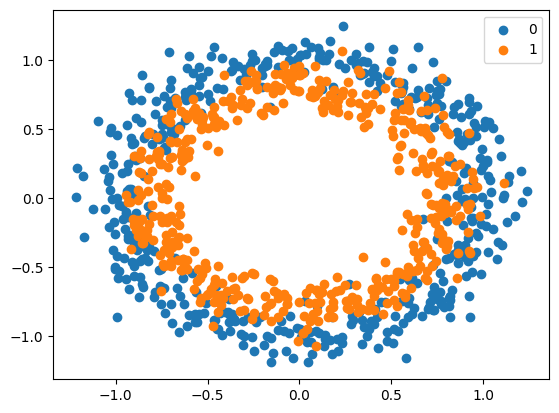

In [104]:
# generación de círculos
# Algunas librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from tensorflow import keras

X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()

In [105]:
# Creación del modelo
def build_model2(activation = 'sigmoid', loss='binary_crossentropy'):
  model = keras.models.Sequential()
  model.add(keras.layers.Dense(4, input_dim=2, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1, activation = activation))
  opt = keras.optimizers.SGD(learning_rate=0.01)
  model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
  return model

#https://developers.google.com/machine-learning/crash-course/classification/accuracy#:~:text=Accuracy%20is%20one%20metric%20for,predictions%20Total%20number%20of%20predictions

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5152 - loss: 0.6890 - val_accuracy: 0.5120 - val_loss: 0.6883
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5086 - loss: 0.6901 - val_accuracy: 0.5100 - val_loss: 0.6881
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5231 - loss: 0.6880 - val_accuracy: 0.5140 - val_loss: 0.6879
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5241 - loss: 0.6857 - val_accuracy: 0.5320 - val_loss: 0.6877
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5181 - loss: 0.6866 - val_accuracy: 0.5340 - val_loss: 0.6875
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5290 - loss: 0.6853 - val_accuracy: 0.5460 - val_loss: 0.6873
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4954 - loss: 0.6885 - val_accuracy: 0.5580 - val_loss: 0.6872
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5062 - loss: 0.6877 - val_accur

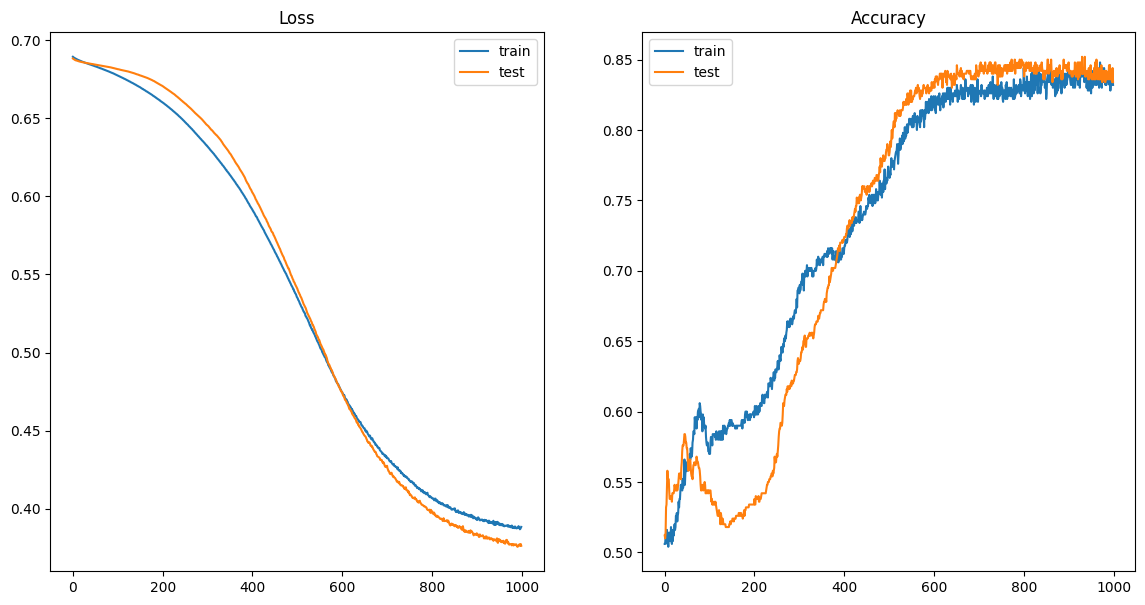

In [106]:
# binary cross entropy:
keras.backend.clear_session()
# Prerprocesado de los datos
n_train = 500
train_X, test_X = X[:n_train, :], X[n_train:, :]
train_y, test_y = y[:n_train], y[n_train:]
model = build_model2()
history = model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=1000, verbose=1)
# Evaluación del modelo
_, train_acc = model.evaluate(train_X, train_y, verbose=0)
_, test_acc = model.evaluate(test_X, test_y, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# Gráficas:
plt.figure(figsize=(14,7))
# Gráfica de pérdidas durante el entrenamiento
plt.subplot(121)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# Gráfica de las precisión durante el entrenamiento
plt.subplot(122)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Laboratorio
1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos.

2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación.

In [107]:
## 1)

In [108]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.datasets import make_moons


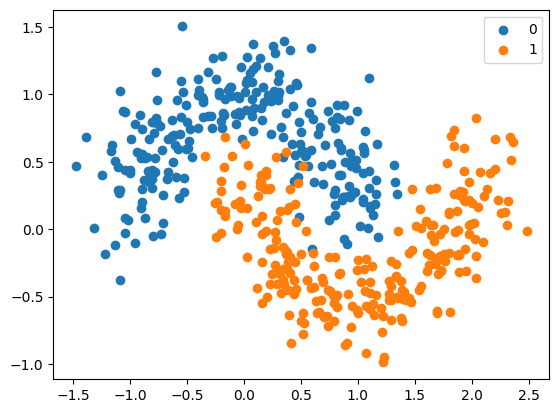

In [109]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=42)

plt.scatter(X[np.where((y==0)),0],X[np.where((y==0)),1], label='0')
plt.scatter(X[np.where((y==1)),0],X[np.where((y==1)),1], label='1')
plt.legend()
plt.show()


In [110]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División en train/test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5604 - loss: 0.6389 - val_accuracy: 0.6467 - val_loss: 0.5531
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7299 - loss: 0.5149 - val_accuracy: 0.8400 - val_loss: 0.4466
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8421 - loss: 0.3923 - val_accuracy: 0.8467 - val_loss: 0.3571
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8444 - loss: 0.3366 - val_accuracy: 0.8400 - val_loss: 0.3173
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8462 - loss: 0.2904 - val_accuracy: 0.8467 - val_loss: 0.3056
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8403 - loss: 0.3249 - val_accuracy: 0.8533 - val_loss: 0.2993
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8492 - loss: 0.2943 - val_accuracy: 0.8667 - val_loss: 0.2936
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8947 - loss: 0.2443 - val_accuracy: 0.8667 - val_lo

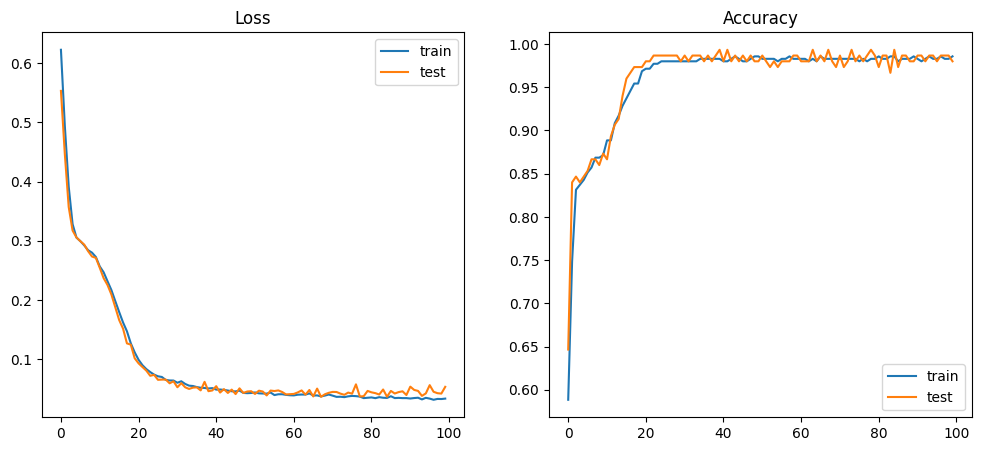

In [111]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(8, input_dim=2, activation='relu'))   # capa 1
    model.add(keras.layers.Dense(4, activation='relu'))                # capa 2
    model.add(keras.layers.Dense(1, activation='sigmoid'))             # salida binaria
    opt = keras.optimizers.Adam(learning_rate=0.01)  # Adam suele converger más rápido que SGD
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

# Entrenamos el modelo
model = build_model()
history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    epochs=100,           # solo 100 épocas
    batch_size=32,        # entrenamiento por lotes (más eficiente)
    verbose=1
)

# Evaluación final
train_acc = model.evaluate(train_X, train_y, verbose=0)[1]
test_acc = model.evaluate(test_X, test_y, verbose=0)[1]
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')

# Gráficas de pérdida y accuracy
plt.figure(figsize=(12,5))

plt.subplot(121)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.legend()

plt.show()

In [112]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape


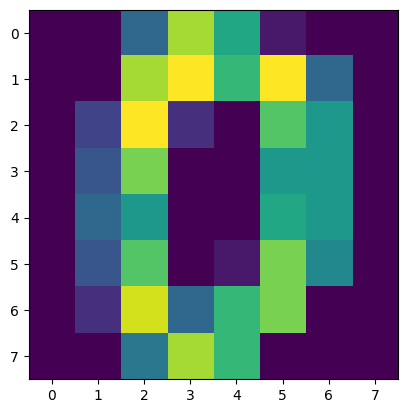

In [113]:
plt.imshow(X[0].reshape(8, 8))

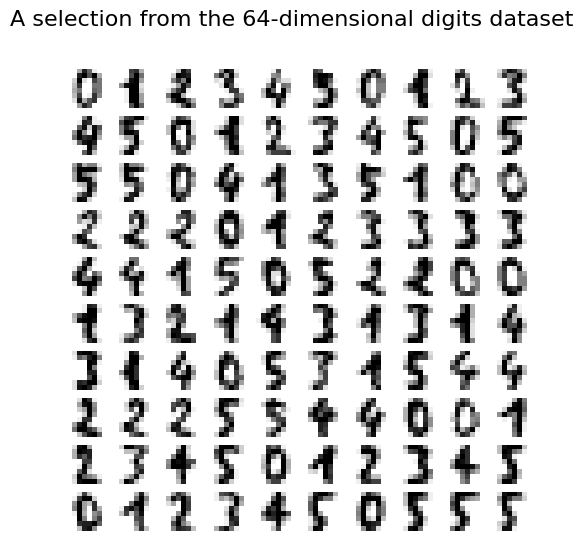

In [114]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3255 - loss: 1.7278 - val_accuracy: 0.7834 - val_loss: 1.1300
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8652 - loss: 0.9718 - val_accuracy: 0.8894 - val_loss: 0.5812
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9464 - loss: 0.4418 - val_accuracy: 0.9355 - val_loss: 0.3093
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9673 - loss: 0.2159 - val_accuracy: 0.9401 - val_loss: 0.2001
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9704 - loss: 0.1485 - val_accuracy: 0.9539 - val_loss: 0.1434
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9864 - loss: 0.0930 - val_accuracy: 0.9677 - val_loss: 0.1119
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9848 - loss: 0.0775 - val_accuracy: 0.9770 - val_loss: 0.0929
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9941 - loss: 0.0543 - val_accuracy: 0.9816 - val_loss: 0.0781
Ep

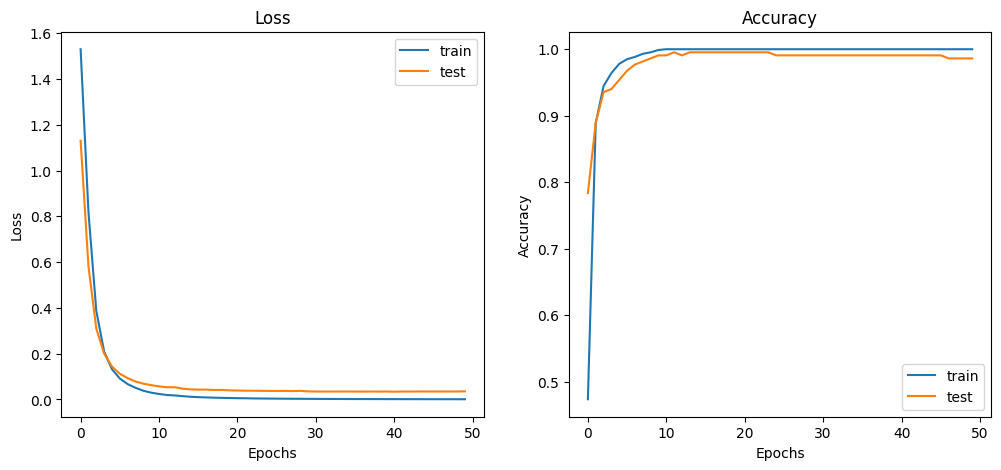

In [115]:
from tensorflow import keras

digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

# Escalar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# One-hot encoding de las etiquetas
y_categorical = keras.utils.to_categorical(y, num_classes=6)

# Dividir datos
train_X, test_X, train_y, test_y = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

# Se define el modelo
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, input_dim=n_features, activation='relu'))  # capa 1
    model.add(keras.layers.Dense(32, activation='relu'))                        # capa 2
    model.add(keras.layers.Dense(6, activation='softmax'))                      # salida multiclase

    opt = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

#Se entrena el modelo
model = build_model()
history = model.fit(
    train_X, train_y,
    validation_data=(test_X, test_y),
    epochs=50,
    batch_size=32,
    verbose=1
)
# Evaluación
train_acc = model.evaluate(train_X, train_y, verbose=0)[1]
test_acc = model.evaluate(test_X, test_y, verbose=0)[1]
print(f'Train: {train_acc:.3f}, Test: {test_acc:.3f}')

#Gráficas de pérdidas
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
